In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
#1. choose model class
# Multilayer perceptron
from sklearn.neural_network import MLPClassifier  
from sklearn.pipeline import make_pipeline # a step to be included if want to use Neural Network / NLP

# when input feature is non-numerical (e.g. string)
# identify the frequency of individual text
from sklearn.feature_extraction.text import TfidfVectorizer 

#2. instantiate model
mlp = make_pipeline(TfidfVectorizer(),  MLPClassifier(hidden_layer_sizes=(10), max_iter=1000,solver = 'lbfgs'))
# solver parameter is the algorithm

#3. fit model to data
mlp.fit(train.data, train.target) #(train, predict on testing)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=10, max_iter=1000,
                               solver='lbfgs'))])

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       319
           1       0.74      0.69      0.71       389
           2       0.67      0.65      0.66       394
           3       0.57      0.64      0.60       392
           4       0.75      0.74      0.74       385
           5       0.76      0.70      0.73       395
           6       0.64      0.77      0.70       390
           7       0.87      0.82      0.84       396
           8       0.88      0.90      0.89       398
           9       0.95      0.85      0.90       397
          10       0.94      0.96      0.95       399
          11       0.83      0.90      0.87       396
          12       0.72      0.67      0.69       393
          13       0.78      0.74      0.76       396
          14       0.77      0.89      0.82       394
          15       0.76      0.92      0.84       398
          16       0.72      0.86      0.79       364
          17       0.94    

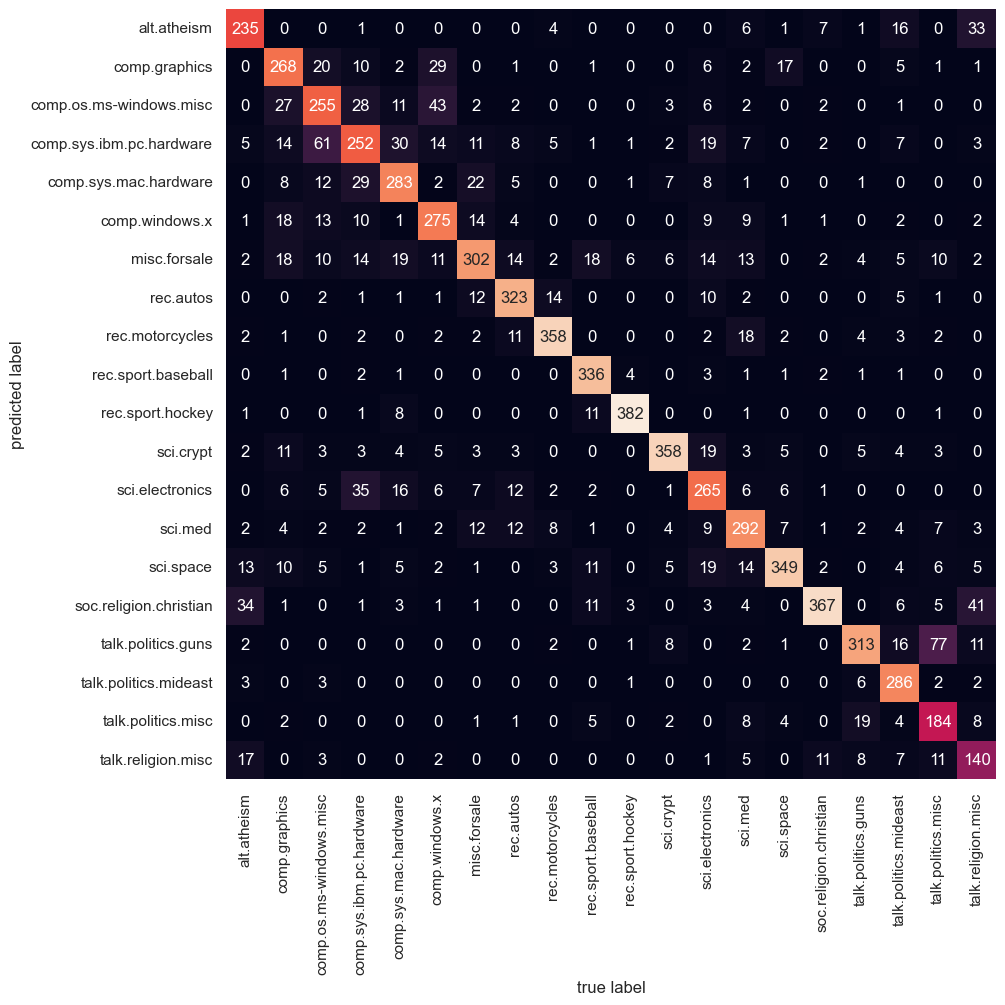

In [7]:
#4. predict on  new data
labels_mlp = mlp.predict(test.data)

# evaluate performance
from sklearn.metrics import confusion_matrix, classification_report # for details anlysis

fig, ax = plt.subplots(figsize=(10,10)) 

mat = confusion_matrix(test.target, labels_mlp)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');



print(classification_report(test.target, labels_mlp))

In [8]:
def predict_category(s, train=train, model=mlp):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [9]:
# Type your own words
# For example

A= ' graphic card '


predict_category(A)


'comp.sys.ibm.pc.hardware'

In [11]:
B = ' windows 10 '


predict_category(B)

'comp.os.ms-windows.misc'